In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Suppress ConvergenceWarnings
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [37]:
df=pd.read_csv('NO HOA MLS.csv',low_memory=False)
df1=df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 104 entries, List Number to Features
dtypes: float64(31), int64(9), object(64)
memory usage: 39.7+ MB


In [5]:
df.info(max_cols=180, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 104 columns):
 #    Column                                  Non-Null Count  Dtype  
---   ------                                  --------------  -----  
 0    List Number                             50000 non-null  int64  
 1    Agency Name                             50000 non-null  object 
 2    Agency Phone                            49772 non-null  object 
 3    Listing Agent                           50000 non-null  object 
 4    Co-Listing Agent                        8616 non-null   object 
 5    Property Type                           50000 non-null  object 
 6    Card Format                             50000 non-null  object 
 7    Selling Agency                          16288 non-null  object 
 8    Selling Agent                           16288 non-null  object 
 9    Co-Selling Agent                        0 non-null      float64
 10   End Date                                0 no

In [6]:
df = df.drop_duplicates()

In [7]:
def drop_columns_with_high_null(df, threshold=0.75):
    null_percentages = df.isnull().mean()
    columns_to_drop = null_percentages[null_percentages > threshold].index
    df = df.drop(columns=columns_to_drop)
    return df

In [8]:
df=drop_columns_with_high_null(df, threshold=0.67)

In [9]:
df.isnull().sum().sort_values()

List Number                 0
Year Built                  0
Buyer/Broker                0
Subagents                   0
# Bedrooms                  0
                        ...  
Zip4                    23616
Owner/Occ Phn - DND2    29283
Temp Off Market Date    31260
Cancel Date             31878
Under Contract Date     32871
Length: 72, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 72 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   List Number           50000 non-null  int64  
 1   Agency Name           50000 non-null  object 
 2   Agency Phone          49772 non-null  object 
 3   Listing Agent         50000 non-null  object 
 4   Property Type         50000 non-null  object 
 5   Card Format           50000 non-null  object 
 6   Dwelling Type         50000 non-null  object 
 7   List Date             50000 non-null  object 
 8   Under Contract Date   17129 non-null  object 
 9   Status                50000 non-null  object 
 10  Status Change Date    50000 non-null  object 
 11  Temp Off Market Date  18740 non-null  object 
 12  Cancel Date           18122 non-null  object 
 13  UCB or CCBS           49303 non-null  object 
 14  Original List Price   50000 non-null  float64
 15  List Price         

In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
List Number,50000.0,NaN,NaN,NaN,2743835.34358,135822.386986,2423734.0,2726847.5,2780762.5,2834422.25,2889479.0
Agency Name,50000,2382,"Dan Schwartz Realty, Inc (schw01)",1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agency Phone,49772,2274,(602) 942-4200,1601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Listing Agent,50000,15646,W. Russell Shaw,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property Type,50000,1,Residential,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Subdivision,49688,19803,Metes & Bounds,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Photo URL,48606,48606,http://cdn.photos.sparkplatform.com/az/2008020...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days on Market,50000.0,NaN,NaN,NaN,137.26176,126.610734,-1341.0,53.0,109.0,183.0,3192.0
Rooms,26682,23052,Master Bedroom:|||||;Bedroom 2:|||||;Bedroom 3...,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

# Printing the list of constant columns
print("Columns with constant value:", constant_columns)


Columns with constant value: ['Property Type', 'Card Format', 'State/Province', 'Country']


In [13]:
df.drop('Property Type',axis=1, inplace= True )
df.drop('Card Format',axis=1, inplace= True )
df.drop('State/Province',axis=1, inplace= True )
df.drop('Country',axis=1, inplace= True )

In [14]:
mask_HOA = df['Features'].str.contains(r'\bAssociation & Fees|HOA Y/N|N;\b', case=False, na=False, regex=True)


In [15]:
mask_HOA.sum()

50000

In [17]:
def segregate_columns(df):
    categorical_cols = df.select_dtypes(include='object').columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    return categorical_cols, numerical_cols

In [18]:
categorical_cols, numerical_cols=segregate_columns(df)

In [19]:
df[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   List Number           50000 non-null  int64  
 1   Original List Price   50000 non-null  float64
 2   List Price            50000 non-null  float64
 3   Price/SqFt            47835 non-null  float64
 4   Zip Code              50000 non-null  int64  
 5   Geo Lat               49750 non-null  float64
 6   Geo Lon               49750 non-null  float64
 7   Approx SQFT           47835 non-null  float64
 8   Bedrooms Plus         49944 non-null  float64
 9   Year Built            50000 non-null  int64  
 10  # Bedrooms            50000 non-null  int64  
 11  # Bathrooms           49946 non-null  float64
 12  # of Interior Levels  50000 non-null  int64  
 13  Exterior Stories      50000 non-null  int64  
 14  Taxes                 48891 non-null  float64
 15  Tax Year           

In [20]:
for i in numerical_cols:
    df[i].fillna(df[i].mean(), inplace=True)
df[numerical_cols].isnull().sum()

List Number             0
Original List Price     0
List Price              0
Price/SqFt              0
Zip Code                0
Geo Lat                 0
Geo Lon                 0
Approx SQFT             0
Bedrooms Plus           0
Year Built              0
# Bedrooms              0
# Bathrooms             0
# of Interior Levels    0
Exterior Stories        0
Taxes                   0
Tax Year                0
Hundred Block           0
Zip4                    0
Comp to Subagent        0
Comp to Buyer Broker    0
Assessor's Book #       0
Assessor's Map #        0
Assessor's Parcel #     0
Days on Market          0
dtype: int64

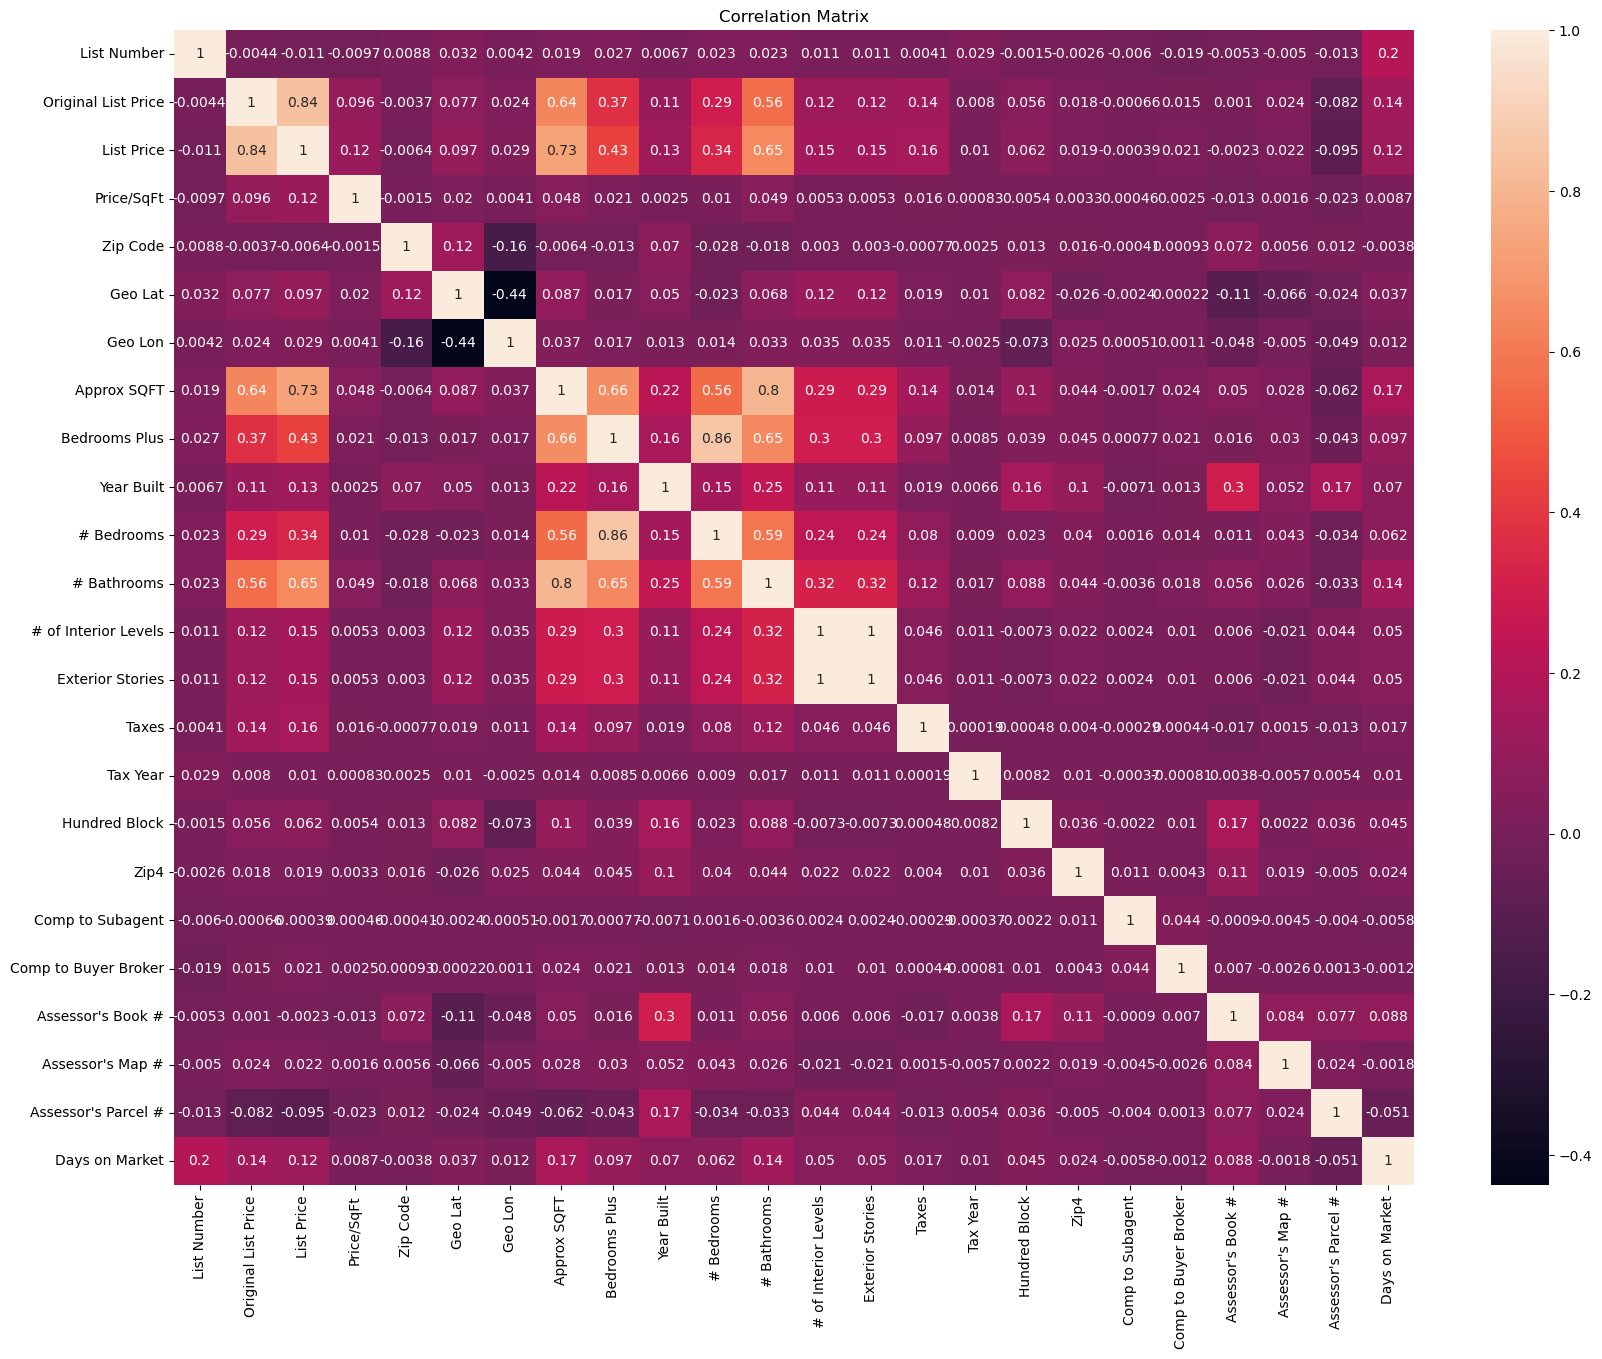

In [21]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [22]:
df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Agency Name           50000 non-null  object
 1   Agency Phone          49772 non-null  object
 2   Listing Agent         50000 non-null  object
 3   Dwelling Type         50000 non-null  object
 4   List Date             50000 non-null  object
 5   Under Contract Date   17129 non-null  object
 6   Status                50000 non-null  object
 7   Status Change Date    50000 non-null  object
 8   Temp Off Market Date  18740 non-null  object
 9   Cancel Date           18122 non-null  object
 10  UCB or CCBS           49303 non-null  object
 11  Map Code/Grid         50000 non-null  object
 12  House Number          50000 non-null  object
 13  Compass               50000 non-null  object
 14  Street Name           50000 non-null  object
 15  St Suffix             49998 non-null

In [23]:
for i in categorical_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)
df[categorical_cols].isnull().sum()

Agency Name             0
Agency Phone            0
Listing Agent           0
Dwelling Type           0
List Date               0
Under Contract Date     0
Status                  0
Status Change Date      0
Temp Off Market Date    0
Cancel Date             0
UCB or CCBS             0
Map Code/Grid           0
House Number            0
Compass                 0
Street Name             0
St Suffix               0
City/Town Code          0
County Code             0
Buyer Broker $/%        0
Buyer/Broker            0
Subagents               0
Variable Commission     0
Pool                    0
Public Remarks          0
Assessor Number         0
Directions              0
Ownr/Occ Name - DND2    0
Owner/Occ Phn - DND2    0
Builder Name            0
mod_timestamp           0
Source of SqFt          0
Horses                  0
Ownership               0
Type                    0
Elementary School       0
Jr. High School         0
High School             0
Hndrd Blk Directionl    0
Off Market D

In [24]:
df[categorical_cols]

,Agency Name,Agency Phone,Listing Agent,Dwelling Type,List Date,Under Contract Date,Status,Status Change Date,Temp Off Market Date,Cancel Date,...,Elementary School,Jr. High School,High School,Hndrd Blk Directionl,Off Market Date,Cross Street,Subdivision,Photo URL,Rooms,Features
0,RE/MAX at the Village (ratv01),(480) 595-1000,Kathie Nohre,Single Family - Detached,2007-09-07,2007-06-29,E,2010-06-30,2007-08-14,2007-10-01,...,Black Mountain,Sonoran Trails,Cactus Shadows,N,2010-07-01,Tom Darlington/Cave Creek Rd,Cow Track Estates 2,http://cdn.photos.sparkplatform.com/az/2008020...,Master Bedroom:||14|19||;Bedroom 2:||16|20||;B...,Association & Fees|HOA Y/N|N;Items Updated|Flo...
1,US Preferred Realty (uspr01),(480) 756-9922,Francisca Alvarez,Single Family - Detached,2007-09-15,2007-06-29,L,2008-03-22,2008-03-21,2008-03-21,...,Wood,Fees,Marcos de Niza,W,2008-03-21,BASELINE/HARDY,WOOD PARK VILLAGE,http://cdn.photos.sparkplatform.com/az/2008020...,Master Bedroom:||12|11||;Bedroom 2:||13|10||;B...,Association & Fees|HOA Y/N|N;Items Updated|Flo...
2,Integrity First LLC (kwif05),(480) 733-6300,Joy Currie,Single Family - Detached,2007-09-15,2007-06-29,L,2008-01-27,2008-01-27,2008-01-27,...,Desert Vista,Desert Shadows,Apache Junction,S,2008-01-27,IRONWOOD & SOUTHERN,Superstition Villa,http://cdn.photos.sparkplatform.com/az/2008042...,Master Bedroom:|||||;Bedroom 2:|||||;Bedroom 3...,Association & Fees|HOA Y/N|N;Additional Bedroo...
3,Pete Hays & Associates (pthz01),(480) 609-9090,Pete Hays,Single Family - Detached,2007-09-15,2007-10-31,C,2007-10-31,2007-08-14,2007-10-01,...,Mountain Shadows,Desert Sky,DEER VALLEY HIGH,N,2007-10-31,"51st Ave & Union Hills, North",Chelsea Village,http://cdn.photos.sparkplatform.com/az/2008020...,Master Bedroom:|||||;Bedroom 2:|||||;Bedroom 3...,Association & Fees|HOA Y/N|N;Items Updated|Poo...
4,All Arizona Realty (grso01),(602) 809-9012,Dianna Tangen,Single Family - Detached,2007-09-15,2007-06-29,E,2008-04-30,2007-08-14,2007-10-01,...,WICKENBURG,Vulture Peak,Wickenburg,S,2008-04-30,Vista Royale,Vista Royale,http://cdn.photos.sparkplatform.com/az/2008020...,Master Bedroom:||20|23||;Bedroom 2:||10|14||;B...,Association & Fees|HOA Y/N|N;Additional Bedroo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,DPR Realty LLC (dvpt03),(480) 926-2727,Autumn V Mortensen,Single Family - Detached,2006-01-20,2006-01-29,C,2006-01-29,2007-08-14,2007-10-01,...,Superstition Mountai,Desert Shadows,Apache Junction,E,2006-01-29,Tomahawk and I-60,MB,http://cdn.photos.sparkplatform.com/az/2008020...,Master Bedroom:|||||;Bedroom 2:|||||;Bedroom 3...,Association & Fees|HOA Y/N|N;Sold Info|Payment...
49996,Bud Vasko Realty (bvre01),(623) 876-8184,Irene Vasko,Single Family - Detached,2006-01-20,2006-02-19,C,2006-02-19,2007-08-14,2007-10-01,...,Peoria,Peoria,Peoria,N,2006-02-19,PEORIA / 111 AVE,YOUNGTOWN,http://cdn.photos.sparkplatform.com/az/2008020...,Master Bedroom:||11|12||;Bedroom 2:||10|13||;L...,Association & Fees|HOA Y/N|N;Sold Info|Payment...
49997,Randleman Realty (pprr01),(480) 540-2122,Tanya Schlapfer,Single Family - Detached,2006-01-20,2006-04-27,C,2006-04-27,2007-08-14,2007-10-01,...,Toltec,Toltec,CASA GRANDE,W,2006-04-27,Sunland Gin/Monaco/Laguna,Arizona City Estates,http://cdn.photos.sparkplatform.com/az/2008020...,Master Bedroom:|||||;Bedroom 2:|||||;Bedroom 3...,Association & Fees|HOA Y/N|N;Sold Info|Payment...
49998,John Hall & Associates (halj02),(602) 953-4000,Joann Callaway,Single Family - Detached,2006-01-27,2007-06-29,L,2006-05-01,2006-05-01,2006-05-01,...,Desert Shadows,Desert Shadows,Horizon,N,2006-05-01,***Cactus Rd & 56th Street,Rancho Saguaro,http://cdn.photos.sparkplatform.com/az/2008020...,Master Bedroom:||14|13||;Bedroom 2:||12|11||;B...,Association & Fees|HOA Y/N|N;Additional Bedroo...


In [25]:
for col in categorical_cols:
    df[col].fillna('missing', inplace=True)  # Replace NaNs with a placeholder string
    df[col] = df[col].astype(str)  # Convert all values to string
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

In [26]:
df1.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
List Number,50000.0,NaN,NaN,NaN,2743835.34358,135822.386986,2423734.0,2726847.5,2780762.5,2834422.25,2889479.0
Agency Name,50000,2382,"Dan Schwartz Realty, Inc (schw01)",1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agency Phone,49772,2274,(602) 942-4200,1601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Listing Agent,50000,15646,W. Russell Shaw,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dwelling Type,50000,8,Single Family - Detached,46679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Subdivision,49688,19803,Metes & Bounds,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Photo URL,48606,48606,http://cdn.photos.sparkplatform.com/az/2008020...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days on Market,50000.0,NaN,NaN,NaN,137.26176,126.610734,-1341.0,53.0,109.0,183.0,3192.0
Rooms,26682,23052,Master Bedroom:|||||;Bedroom 2:|||||;Bedroom 3...,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN


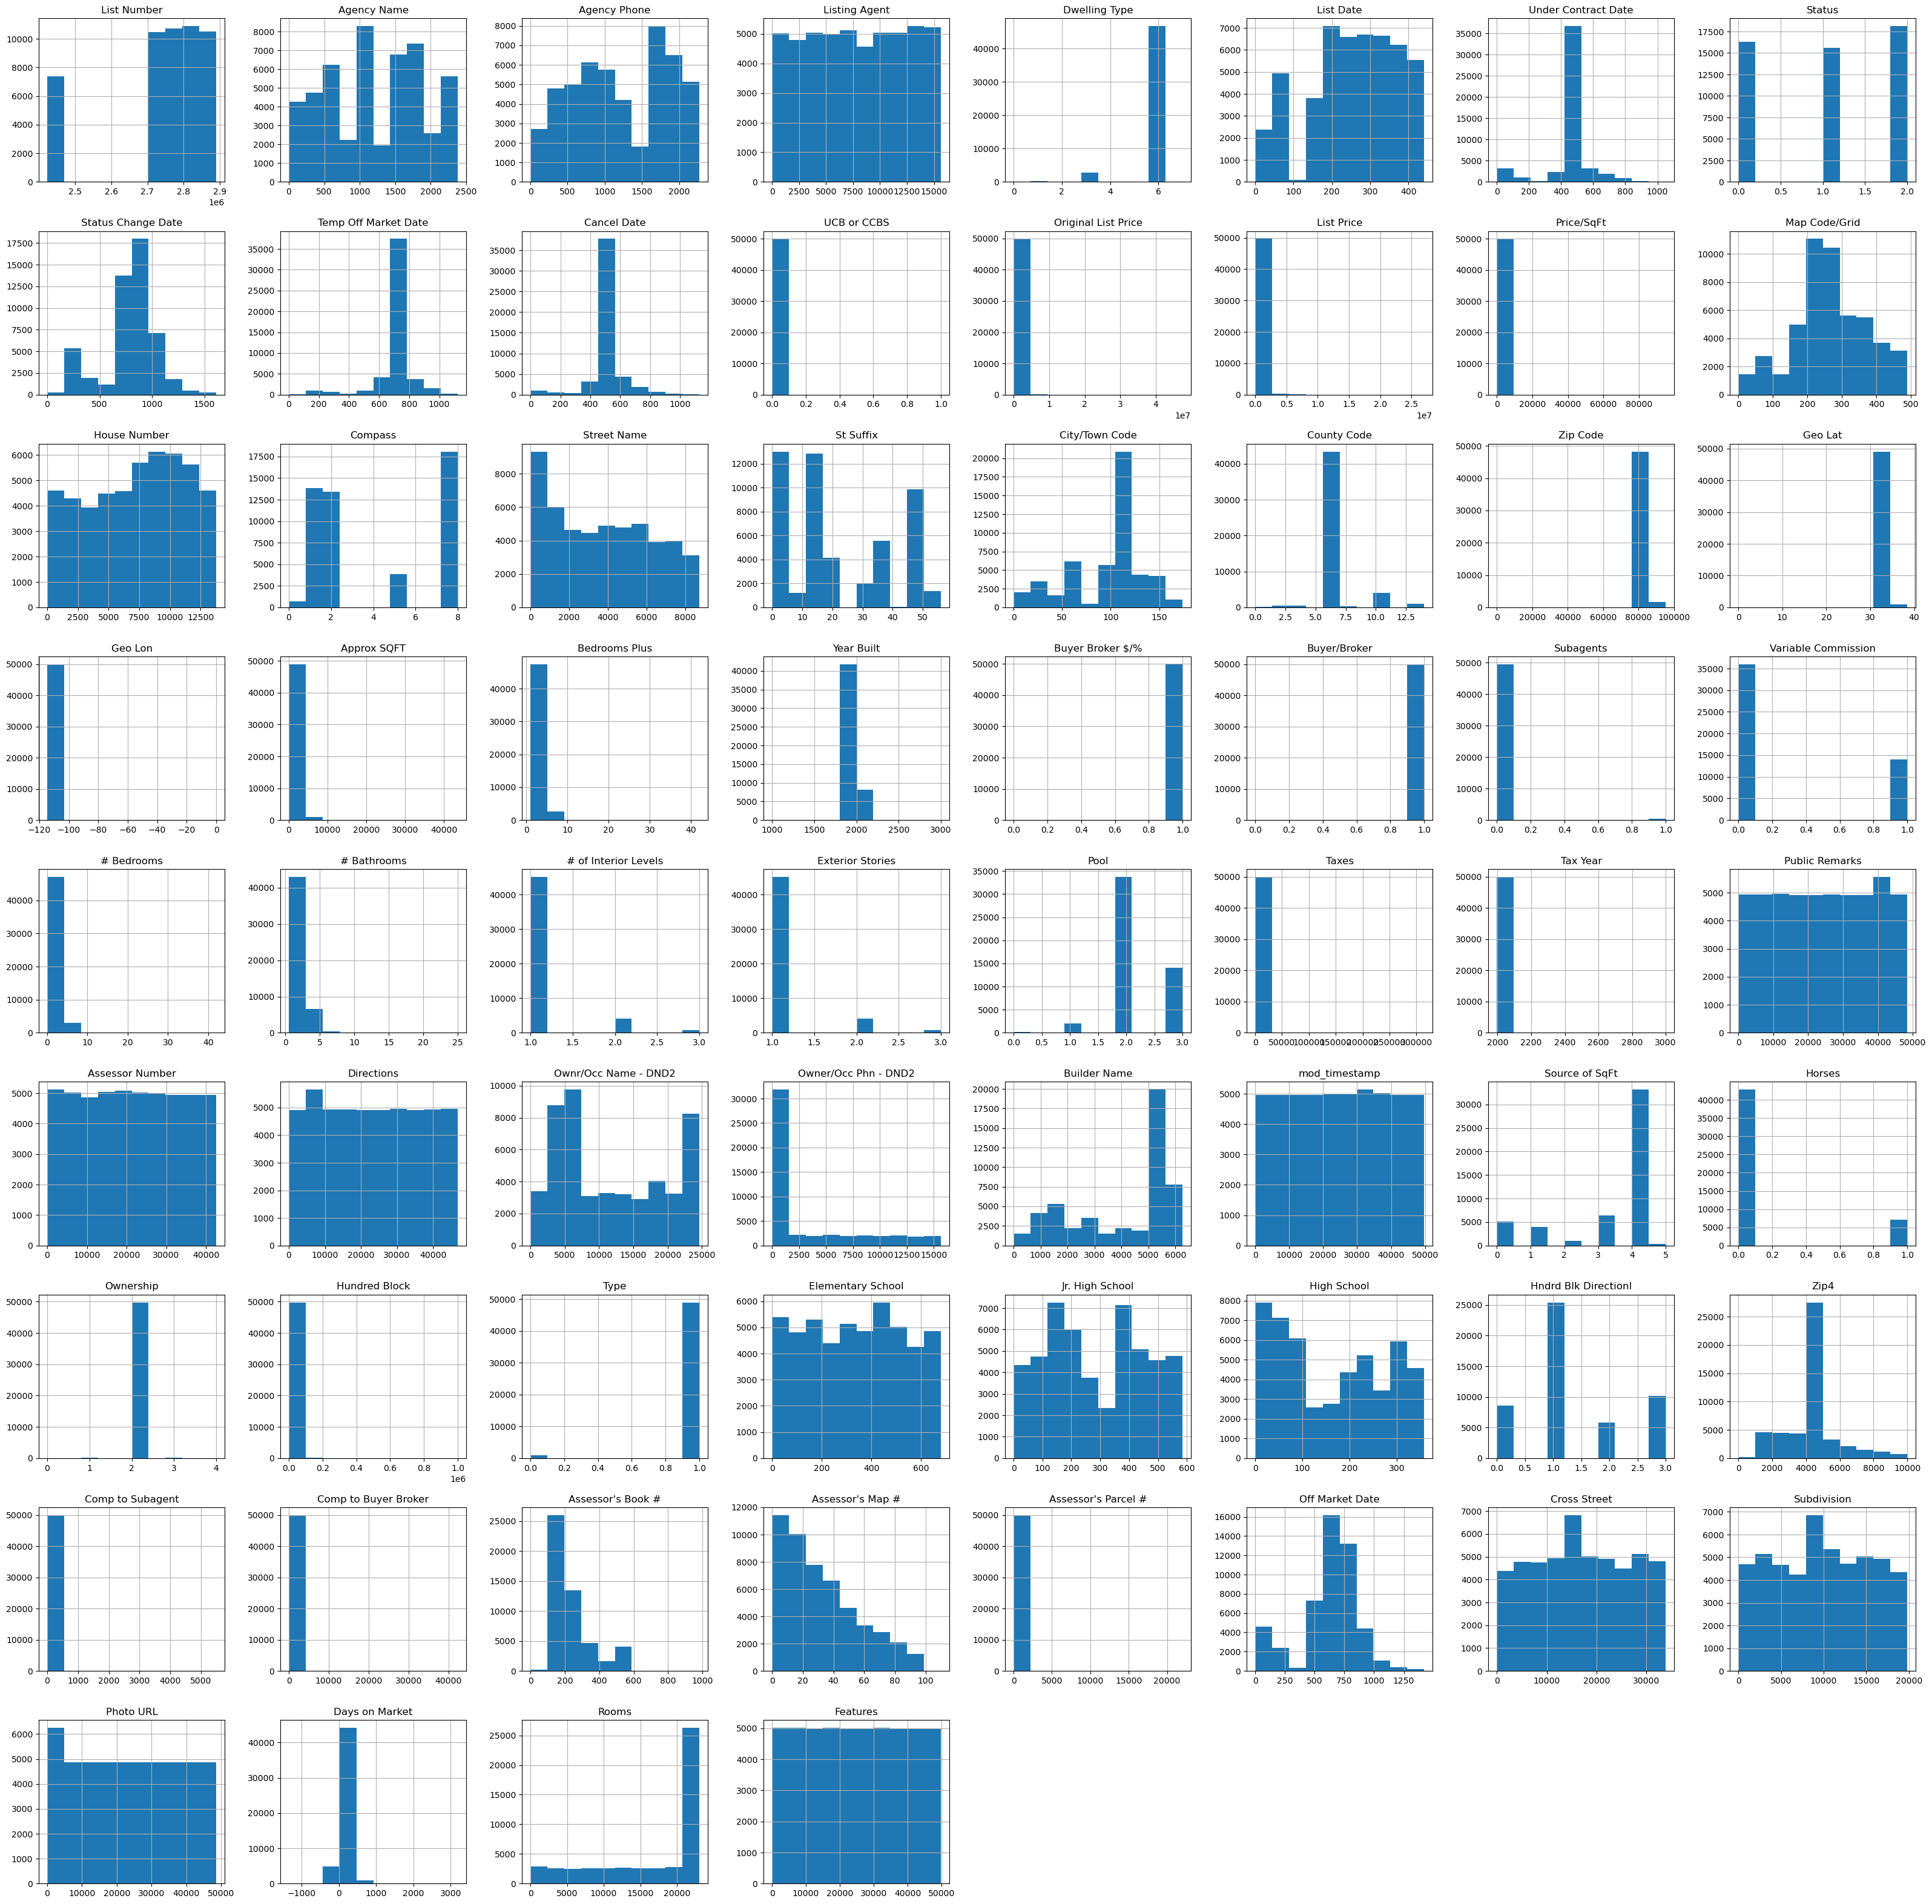

In [27]:
df.hist(figsize=(40,40))
plt.show()

In [28]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [29]:
df_scaled

array([[ 0.74834256,  0.64859356, -1.2500638 , ...,  7.03532093,
        -0.69793494, -0.31153092],
       [ 0.7483352 ,  1.46265278, -0.98114029, ...,  0.40864432,
        -1.87418305, -0.40581834],
       [ 0.74840882, -0.24160068, -1.02543357, ..., -0.02576237,
         0.80390309, -1.47482638],
       ...,
       [-2.12554231,  0.67055559, -1.33548656, ..., -0.33379621,
         0.80390309,  1.13420963],
       [-2.09480333, -0.14789602,  0.77951771, ..., -0.34169451,
        -0.88406186, -1.38172103],
       [-2.12837693,  1.46265278, -0.98114029, ..., -0.29430469,
        -0.78200932,  0.77034082]])

### Dimensionality Reduction 
#### Using PCA for dimensionality reduction, which can be particularly useful when dealing with a large number of features.

In [176]:
pca = PCA(n_components=0.95)  # Keep 95% of variance
df_pca = pca.fit_transform(df_scaled)
df_pca.shape

(50000, 53)

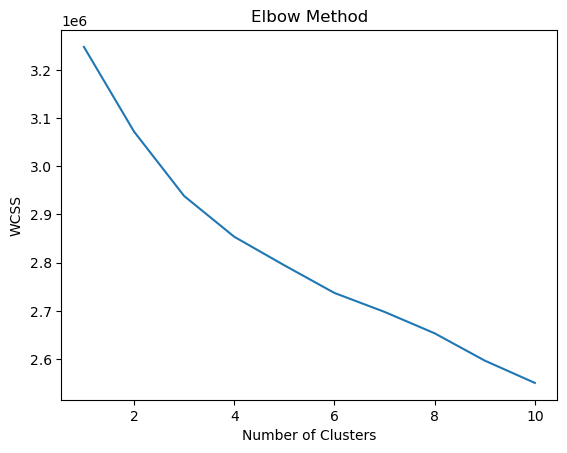

In [177]:
# Find optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# From the plot, choose the 'elbow' point (let's say k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(df_scaled)


In [178]:
df.head()

,List Number,Agency Name,Agency Phone,Listing Agent,Dwelling Type,List Date,Under Contract Date,Status,Status Change Date,Temp Off Market Date,...,Assessor's Book #,Assessor's Map #,Assessor's Parcel #,Off Market Date,Cross Street,Subdivision,Photo URL,Days on Market,Rooms,Features
0,2845476,1667,421,7993,6,359,459,1,1564,674,...,216.0,25.0,50.0,1378,31908,3674,37236,1028,11674,20410
1,2845475,2223,591,4848,6,367,459,2,1005,894,...,301.0,7.0,60.0,832,14008,17994,39583,189,2776,19054
2,2845485,1059,563,7577,6,367,459,2,950,840,...,102.0,22.0,9.0,778,23160,15836,47122,134,23035,3680
3,2845481,1494,442,11833,6,367,583,0,862,674,...,200.0,25.0,36.0,690,7995,3203,30189,46,23035,27313
4,2845486,90,1605,3930,6,367,459,1,1044,674,...,201.0,13.0,157.0,872,33105,17449,39609,228,21171,6667


In [ ]:
# Silhouette Method
silhouette_list = []
K_range_silhouette = range(2, 11)  # Silhouette score is not defined for K=1
for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca)
    silhouette_avg = silhouette_score(df, kmeans.labels_)
    silhouette_list.append(silhouette_avg)

plt.plot(K_range_silhouette, silhouette_list, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.show()


In [ ]:
# Davies-Bouldin Index Method
db_list = []
K_range_db = range(2, 11)  # Davies-Bouldin Index is not defined for K=1
for k in K_range_db:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca)
    db_index = davies_bouldin_score(df, kmeans.labels_)
    db_list.append(db_index)

plt.plot(K_range_db, db_list, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal K')
plt.show()

In [ ]:

# Further reduce dimensions to 2 using PCA (if you haven't already reduced to 2 dimensions)
pca = PCA(n_components=2)
df_pca_2d = pca.fit_transform(df)

# Perform K-means clustering, for example, with 3 clusters
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(df)

# Add cluster number to the DataFrame
df['cluster'] = clusters

# Plot the clusters in 2D
plt.figure(figsize=(10, 6))
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Mark cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.show()

In [59]:
import pandas as pd

# Sample DataFrames df1 and df2
data1 = {'Latitude': [37.123, 38.456, 39.789],
         'Longitude': [-121.456, -122.789, -123.123],
         'Data1_Column': ['A', 'B', 'C']}
data2 = {'Latitude': [37.123, 40.123, 39.789],
         'Longitude': [-121.456, -124.789, -123.123],
         'Data2_Column': [1, 2, 3]}

f1 = pd.DataFrame(data1)
f2 = pd.DataFrame(data2)

# Rename 'Latitude' and 'Longitude' columns to 'x1' and 'x2'
f1.rename(columns={'Latitude': 'x1', 'Longitude': 'x2'}, inplace=True)
f2.rename(columns={'Latitude': 'x1', 'Longitude': 'x2'}, inplace=True)

# Merge the DataFrames on 'x1' and 'x2'
merged_f = f1.merge(f2, on=['x1', 'x2'], how='inner')

# merged_df will contain only rows with matching 'x1' and 'x2' values
merged_f

,x1,x2,Data1_Column,Data2_Column
0,37.123,-121.456,A,1
1,39.789,-123.123,C,3


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 82 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   List Number           50000 non-null  int64  
 1   Agency Name           50000 non-null  object 
 2   Agency Phone          49772 non-null  object 
 3   Listing Agent         50000 non-null  object 
 4   Co-Listing Agent      8616 non-null   object 
 5   Property Type         50000 non-null  object 
 6   Card Format           50000 non-null  object 
 7   Selling Agency        16288 non-null  object 
 8   Selling Agent         16288 non-null  object 
 9   Dwelling Type         50000 non-null  object 
 10  List Date             50000 non-null  object 
 11  Close of Escrow Date  16314 non-null  object 
 12  Under Contract Date   17129 non-null  object 
 13  Status                50000 non-null  object 
 14  Status Change Date    50000 non-null  object 
 15  Temp Off Market Dat

In [52]:
df1.rename(columns={'Geo Lat': 'Latitude'}, inplace=True)
df1.rename(columns={'Geo Lon': 'Longitude'}, inplace=True)

In [53]:
df1=drop_columns_with_high_null(df, threshold=0.98)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 82 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   List Number           50000 non-null  int64  
 1   Agency Name           50000 non-null  object 
 2   Agency Phone          49772 non-null  object 
 3   Listing Agent         50000 non-null  object 
 4   Co-Listing Agent      8616 non-null   object 
 5   Property Type         50000 non-null  object 
 6   Card Format           50000 non-null  object 
 7   Selling Agency        16288 non-null  object 
 8   Selling Agent         16288 non-null  object 
 9   Dwelling Type         50000 non-null  object 
 10  List Date             50000 non-null  object 
 11  Close of Escrow Date  16314 non-null  object 
 12  Under Contract Date   17129 non-null  object 
 13  Status                50000 non-null  object 
 14  Status Change Date    50000 non-null  object 
 15  Temp Off Market Dat

In [54]:
df1.info(max_cols=180, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 82 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   List Number           50000 non-null  int64  
 1   Agency Name           50000 non-null  object 
 2   Agency Phone          49772 non-null  object 
 3   Listing Agent         50000 non-null  object 
 4   Co-Listing Agent      8616 non-null   object 
 5   Property Type         50000 non-null  object 
 6   Card Format           50000 non-null  object 
 7   Selling Agency        16288 non-null  object 
 8   Selling Agent         16288 non-null  object 
 9   Dwelling Type         50000 non-null  object 
 10  List Date             50000 non-null  object 
 11  Close of Escrow Date  16314 non-null  object 
 12  Under Contract Date   17129 non-null  object 
 13  Status                50000 non-null  object 
 14  Status Change Date    50000 non-null  object 
 15  Temp Off Market Dat

In [55]:
df2= pd.read_csv('Phoenix_data_USD (1).csv', low_memory=False)

In [56]:
df2.rename(columns={'Latitude': 'Geo Lat'}, inplace=True)
df2.rename(columns={'Longitude': 'Geo Lon'}, inplace=True)
df2

,Listing URL,Property Type,Geo Lat,Geo Lon,Star Rating,Number of Active Days,Bedrooms,Has pool,Cleaning Fee,Extra Guest Fee,Average Daily Rate LTM,Occupancy Rate LTM,Annual Revenue LTM
0,http://airbnb.com/rooms/61745,Entire Home,33.519190,-112.073470,4.2,3,3,t,350,0,402,40,58804
1,http://airbnb.com/rooms/122773,Entire Home,33.474000,-112.064000,4.9,361,1,f,0,0,106,100,38796
2,http://airbnb.com/rooms/135612,Condo,33.596690,-111.987710,5.0,135,1,t,175,0,92,57,21090
3,http://airbnb.com/rooms/241046,Private Room,33.558070,-112.094420,4.9,367,1,t,20,0,61,72,18249
4,http://airbnb.com/rooms/242595,Private Room,33.529380,-112.096390,4.8,145,1,t,0,10,42,64,9839
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,http://airbnb.com/rooms/958723972133502202,Entire Home,33.471815,-112.051348,0.0,13,2,t,0,0,147,100,53802
7031,http://airbnb.com/rooms/958777577132565108,Entire Home,33.383970,-112.012160,0.0,14,Studio,t,0,0,59,100,21594
7032,http://airbnb.com/rooms/959114708267573468,Entire Home,33.384001,-112.166790,0.0,14,4,t,0,0,185,100,67710
7033,http://airbnb.com/rooms/960401395602956462,Entire Home,33.384169,-112.012267,0.0,14,Studio,t,0,0,59,100,21594


In [57]:
merged_df = df1.merge(df2, on=['Geo Lat','Geo Lon'], how='inner')
merged_df

,List Number,Agency Name,Agency Phone,Listing Agent,Co-Listing Agent,Property Type_x,Card Format,Selling Agency,Selling Agent,Dwelling Type,...,Property Type_y,Star Rating,Number of Active Days,Bedrooms,Has pool,Cleaning Fee,Extra Guest Fee,Average Daily Rate LTM,Occupancy Rate LTM,Annual Revenue LTM
